In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def one_degree_dist(latitude = 40.7128):
    # default value is for NYC
    # other latitudes: SPb - 59.9343, Paris - 48.8566, MSK - 55.7558, Kiev - 50.4501 
    R = 6371
    rad = latitude/360*2*math.pi
    
    return 2*math.pi*R/360*math.sin(rad)

In [62]:
train = pd.read_csv("../input/nyc_taxi/train.zip", compression='zip')

In [89]:
test = pd.read_csv("../input/nyc_taxi/test.zip", compression='zip')

In [90]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [64]:
train['longitude_diff'] = abs(train['pickup_longitude'] - train['dropoff_longitude'])
train['latitude_diff'] = abs(train['pickup_latitude'] - train['dropoff_latitude'])

In [65]:
d = one_degree_dist()

In [66]:
train['trip_distance'] = train['longitude_diff'] * d + train['latitude_diff'] * 111.32

In [82]:
train['trip_distance'].head()

0    1.530935
1    2.207924
2    7.902769
3    1.636820
4    1.199282
Name: trip_distance, dtype: float64

(array([  1.45862800e+06,   5.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([    0.        ,   132.44526605,   264.8905321 ,   397.33579815,
          529.7810642 ,   662.22633026,   794.67159631,   927.11686236,
         1059.56212841,  1192.00739446,  1324.45266051]),
 <a list of 10 Patch objects>)

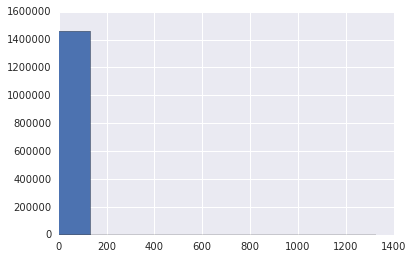

In [79]:
plt.hist(train['trip_distance'])

In [88]:
train['trip_distance'].nlargest(100)

184925     1324.452661
974378     1143.902237
1100676     753.884401
910072      749.473015
923793      729.334533
397526      632.811542
1013474     463.450436
377068      411.562560
275644      391.962363
1060807     286.855616
644165      272.484149
114376      221.000709
1301396     215.201576
1416336     171.918200
14502       151.862976
978647      149.322290
512980      131.451367
1085898     119.751195
1359910     113.081048
283102      108.937451
246942      105.667949
396966      104.167252
595540      101.032091
837898       99.788411
823541       99.531443
236614       98.582097
136925       96.876618
702002       96.063758
506284       95.336520
191797       93.200041
              ...     
1262903      63.345512
462765       63.192714
916724       63.169036
992305       63.100395
351997       63.087174
89829        62.991841
954927       62.556127
958446       62.501005
363972       62.329107
326056       62.062186
85764        61.748629
565349       61.040650
532825     